# Explore Atlas

Code blocks to explore a statistical shape atlas. We can compute the variance explained by the shape modes, visualize different shape modes as a function of Z score.

### Import python modules

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import *
import seaborn as sns
import h5py as h5
sns.set_style("ticks")
%matplotlib inline

In [2]:
# this allows us to access local files in this folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load shape atlas

The atlas I'm using is downloaded from the [Cardiac Atlas Project website](https://www.cardiacatlas.org/biventricular-modes/).

In [7]:
# Load shape atlas
# Replace the following path with the actual path to the file in your Google Drive
file_path_in = '/content/drive/MyDrive/SSA_tutorial/'

pc = h5.File(file_path_in + 'UKBRVLV_All.h5', 'r')

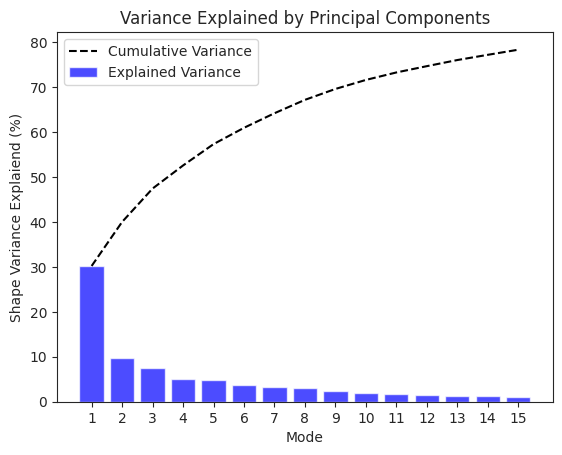

In [8]:
# plot variance
num_modes = 15
explained_variance = pc["EXPLAINED"][0][0:num_modes]
cumulative_variance = np.cumsum(explained_variance)

# Create the figure and axis
fig, ax = plt.subplots()

# Bar chart for explained variance
pc_indices = np.arange(1, num_modes + 1)
ax.bar(pc_indices, explained_variance, alpha=0.7, color='b', label='Explained Variance')

# Line plot for cumulative variance
ax.plot(pc_indices, cumulative_variance, color='black', linestyle='dashed', label='Cumulative Variance')

# Set x-axis labels
ax.set_xticks(pc_indices)
ax.set_xticklabels(pc_indices)

# Add labels, title, and legend
ax.set_xlabel('Mode')
ax.set_ylabel('Shape Variance Explaiend (%)')
ax.set_title('Variance Explained by Principal Components')
ax.legend(loc='upper left')

# Show the plot
plt.show()
plt.close()

### Visualize Atlas Shape and Modes

In [10]:
def genModel(atlas, mode, score):
  S = np.transpose(pc['MU']) + (score * np.sqrt(pc['LATENT'][0,mode]) * pc['COEFF'][mode,:])

  # get ED & ES points, & convert to 3 columns matrix [x, y, z]
  N = S.shape[1] // 2
  ed = np.reshape(S[0,:N], (-1,3))
  es = np.reshape(S[0,N:], (-1,3))
  return ed, es

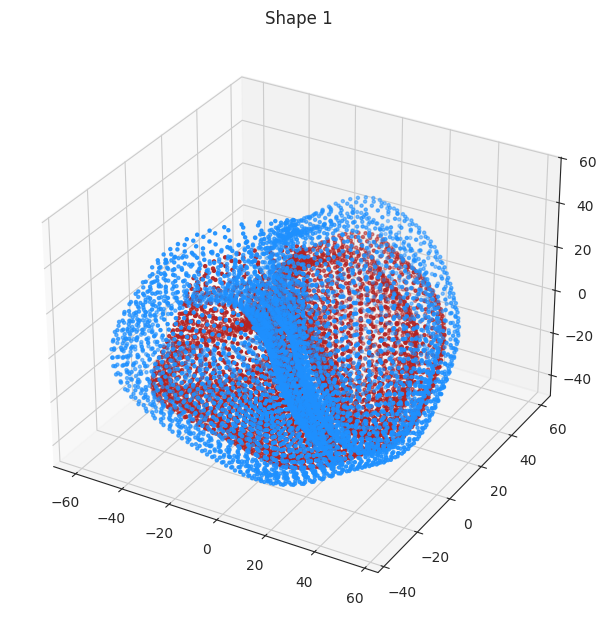

In [43]:
# Generate shape of a specific mode, where first mode is 0 and z-score, where 0 is the mean)
ed1, es1 = genModel(pc, 0, 0.0)

fig = plt.figure(figsize=(12, 12))

# First plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(ed1[:,0], ed1[:,1], ed1[:,2], color='dodgerblue', marker='.')
ax1.scatter(es1[:,0], es1[:,1], es1[:,2], color='firebrick', marker='.')
ax1.set_title('Shape 1')

plt.tight_layout()
plt.show()

In [44]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fixed reference shape
ed1, es1 = genModel(pc, 0, 0.0)

@interact(
    mode=widgets.IntSlider(value=0, min=0, max=10, step=1, description='Mode'),
    zscore=widgets.FloatSlider(value=3.0, min=-5.0, max=5.0, step=0.1, description='Z-score')
)
def update_plot(mode, zscore):
    ed2, es2 = genModel(pc, mode, zscore)

    fig = plt.figure(figsize=(12, 6))

    # Shape 1 (reference)
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.scatter(ed1[:, 0], ed1[:, 1], ed1[:, 2], color='dodgerblue', marker='.')
    ax1.scatter(es1[:, 0], es1[:, 1], es1[:, 2], color='firebrick', marker='.')
    ax1.set_title('Reference Shape')

    # Shape 2 (interactive)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.scatter(ed2[:, 0], ed2[:, 1], ed2[:, 2], color='dodgerblue', marker='.')
    ax2.scatter(es2[:, 0], es2[:, 1], es2[:, 2], color='firebrick', marker='.')
    ax2.set_title(f'Modified Shape (Mode {mode}, Z={zscore:.1f})')

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=0, description='Mode', max=10), FloatSlider(value=3.0, description='Z-sc…